# Examples!

Here are some examples you may see in the wild.

### Helper Functions and Imports

In [15]:
from IPython.display import HTML
from moviepy.editor import *

def display_video(url, width=500, height=500):
    return HTML("""
    <video width="%d" height="%d" style="margin:auto auto;" autoplay loop="true" >
      <source src="%s" type="video/mp4">
    </video>
    """ % (width, height, url))

## Two Captions over GIF

In [ ]:
MAX_LENGTH = 1 # Seconds
screensize = (500,281)

cookie_monster = VideoFileClip("res/cookie_monster.gif").subclip(0, MAX_LENGTH)

def make_caption(text, duration):
    return TextClip(text,
                    color='white', font="Impact", stroke_color='black', stroke_width=1,
                    fontsize=40).set_duration(duration)    

caption_top = make_caption('my face when I', MAX_LENGTH).set_pos('top')

caption_bottom = make_caption('pip install ntlk', MAX_LENGTH).set_pos('bottom')

video = CompositeVideoClip( [cookie_monster, caption_bottom, caption_top] )

video.write_videofile("cookie_monster.mp4")
display_video("cookie_monster.mp4")

## Concatenating many GIFS

In [ ]:
MAX_LENGTH = 1 # Seconds
screensize = (500,281)

reaction_gifs = [VideoFileClip("res/concat_0%d.mp4" % x) for x in range(0, 5)]

final_clip = concatenate_videoclips(reaction_gifs)
caption_top = make_caption('category theory', 8.5).set_pos('top')
caption_bottom = make_caption('in python', 8.5).set_pos('bottom')
CompositeVideoClip( [final_clip, caption_bottom, caption_top] ).write_videofile("cat_theory.mp4", fps=24)

display_video("cat_theory.mp4", 300, 300)

## Zooming in (for intense effect)

In [ ]:
MAX_LENGTH = 1 # Seconds
screensize = (500,281)

caption = make_caption('did I push?', 2).set_pos('bottom')


elmo = (ImageClip("res/elmo.jpg").subclip(0, 2)
                   .resize(height=screensize[1]/2)
                   .resize(lambda t : 1+0.1*t)
                   .set_duration(2))

video = CompositeVideoClip( [elmo, caption] )

video.write_videofile("did_i_push.mp4", fps=24)
display_video("did_i_push.mp4")

## Adding Sound


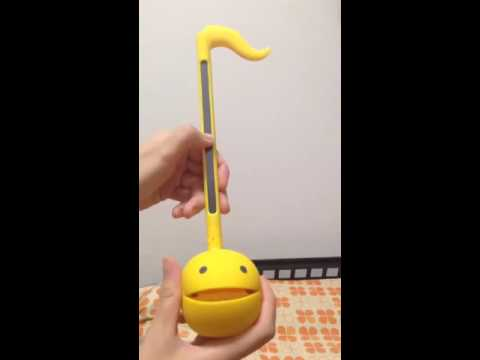

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo("SXIDN11fYyY")

In [33]:
display_video("res/listening.mp4")

In [ ]:
MAX_LENGTH = 1 # Seconds
screensize = (500,281)


sound = AudioFileClip("res/chocobo.mp3")
video = VideoFileClip("res/listening.mp4").loop(4).set_audio(sound)

video.write_videofile("torture.mp4", fps=24)

HTML("""
    <video width="300 height="300" controls style="margin:auto auto;" >
      <source src="torture.mp4" type="video/mp4">
    </video>""")